<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M3L4_Solving_an_analytical_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving an analytical case

[PPT M3L4 ENG](https://docs.google.com/presentation/d/1ZWlKaujmje7ZoNHmey8VPRvoT7mpVI1F0VRPl8XKGDc/edit?usp=sharing)

[PPT M3L4 IND](https://docs.google.com/presentation/d/1cGzKWdycB7dpLd1TjXbOHX3E6aAmSCqxpdEXjExFlOo/edit?usp=sharing)

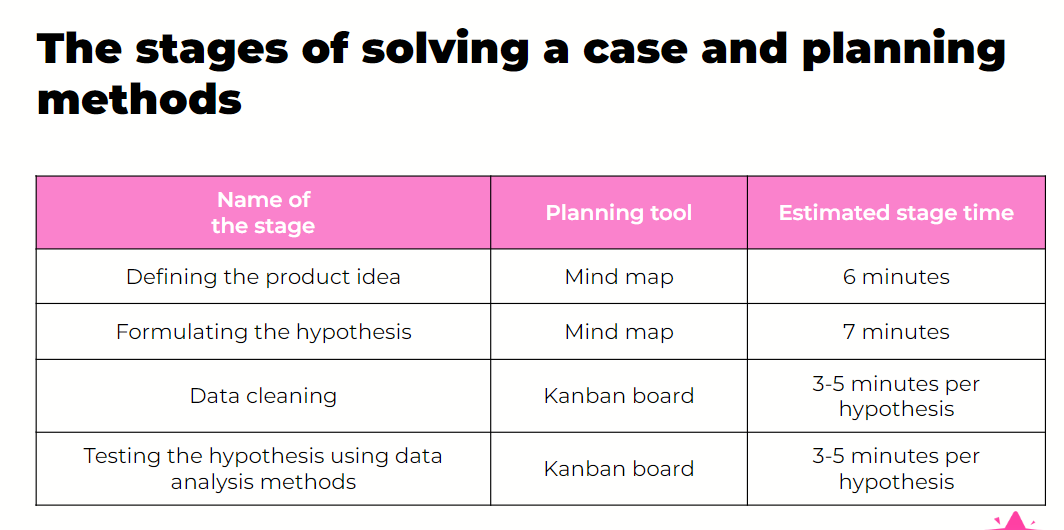

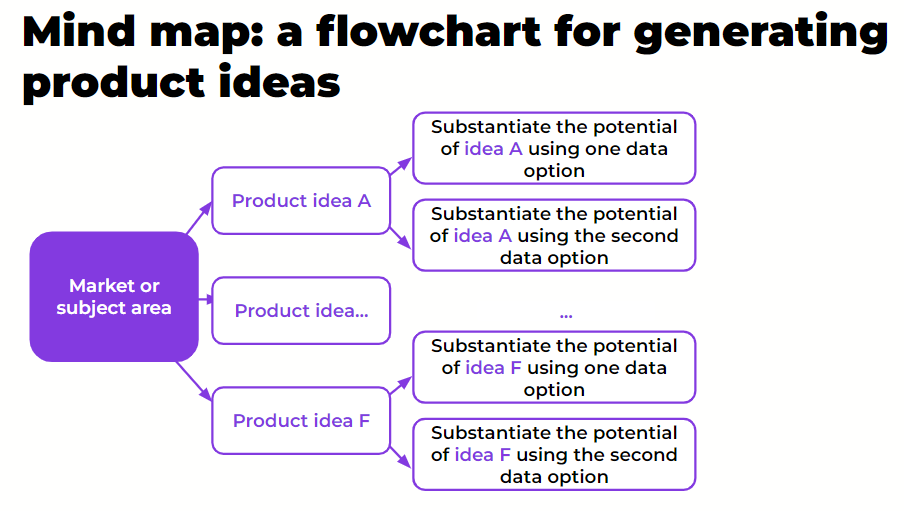

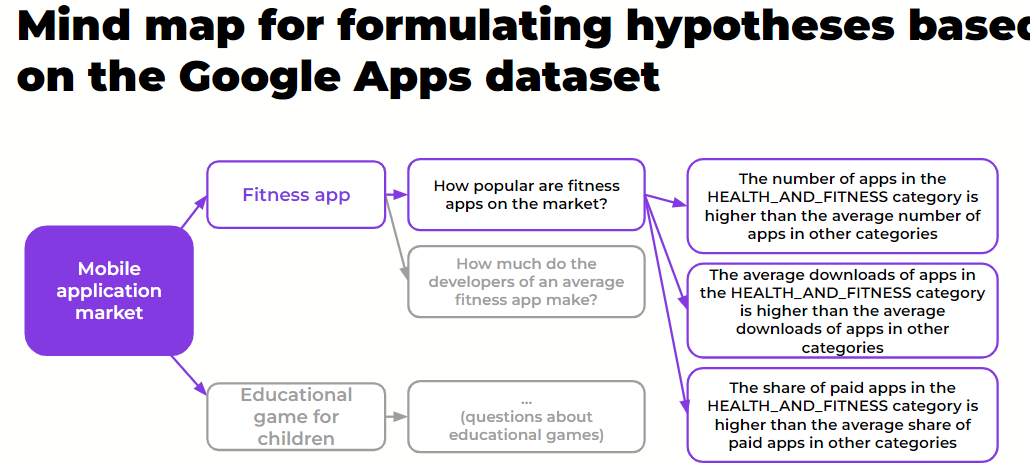

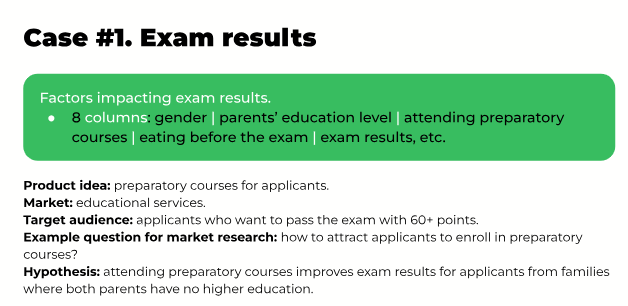

- yang ikut course nilainya lebih tinggi --> math, writing, reading, rata2
- yang pendidikan ortunya lebih rendah, nilainya lebih rendah, dan sebaliknya.

In [ ]:
import pandas as pd

df = pd.read_csv('StudentsPerformance .csv')

## cek dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## parental level of education

In [ ]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

## yg udah course dan belum

In [ ]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

## rata2 nilai per anak

In [ ]:
mean_nilai = (df['math score'] + df['reading score'] + df['writing score']) / 3

df['mean score'] = mean_nilai

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   mean score                   1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### rata2 nilai untuk tiap parental

In [ ]:
df.groupby(by = 'parental level of education')['mean score'].mean()

parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: mean score, dtype: float64

### rata2 nilai untuk yang udah course dan belum

In [ ]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [ ]:
df.groupby(by = 'test preparation course')['mean score'].mean()

test preparation course
completed    72.669460
none         65.038941
Name: mean score, dtype: float64

### groupby course dan parental

In [ ]:
# rata2 mean score untuk tiap parental dan course
df.groupby(by = ['parental level of education','test preparation course'])['mean score'].agg(['max', 'min', 'mean'])

max        min  \
parental level of education test preparation course                          
associate's degree          completed                 97.666667  44.333333   
                            none                     100.000000  31.666667   
bachelor's degree           completed                100.000000  39.666667   
                            none                     100.000000  39.000000   
high school                 completed                 95.666667  34.333333   
                            none                      94.000000  18.333333   
master's degree             completed                 97.666667  44.666667   
                            none                      97.333333  50.666667   
some college                completed                 98.666667  50.333333   
                            none                      99.000000  23.333333   
some high school            completed                 99.000000  37.666667   
                            none                      91.333333   9.000000   

                                                          mean  
parental level of education test preparation course             
associate's degree          completed                74.939024  
                            none                     66.423810  
bachelor's degree           completed                76.239130  
                            none                     69.166667  
high school                 completed                66.964286  
                            none                     61.550000  
master's degree             completed                76.316667  
                            none                     72.205128  
some college                completed                74.653680  
                            none                     65.284116  
some high school            completed                69.337662  
                            none                     61.915033

In [ ]:
df.pivot_table(index = 'parental level of education',
               columns = 'test preparation course',
               values = 'mean score',
               aggfunc = ['min', 'max', 'mean'])

min                    max              \
test preparation course      completed       none   completed        none   
parental level of education                                                 
associate's degree           44.333333  31.666667   97.666667  100.000000   
bachelor's degree            39.666667  39.000000  100.000000  100.000000   
high school                  34.333333  18.333333   95.666667   94.000000   
master's degree              44.666667  50.666667   97.666667   97.333333   
some college                 50.333333  23.333333   98.666667   99.000000   
some high school             37.666667   9.000000   99.000000   91.333333   

                                  mean             
test preparation course      completed       none  
parental level of education                        
associate's degree           74.939024  66.423810  
bachelor's degree            76.239130  69.166667  
high school                  66.964286  61.550000  
master's degree              76.316667  72.205128  
some college                 74.653680  65.284116  
some high school             69.337662  61.915033

## data per pelajaran

### rata2 per pelajaran berdasarkan parental dan course

In [ ]:
df.pivot_table(index = 'parental level of education',
               columns = 'test preparation course',
               values = ['math score', 'reading score', 'writing score'],
               aggfunc = 'mean')

math score            reading score             \
test preparation course      completed       none     completed       none   
parental level of education                                                  
associate's degree           71.829268  65.571429     76.170732  67.857143   
bachelor's degree            73.282609  66.902778     76.739130  70.611111   
high school                  65.000000  60.992857     67.839286  63.450000   
master's degree              70.600000  69.307692     78.250000  73.897436   
some college                 71.454545  64.892617     75.987013  66.087248   
some high school             66.701299  61.078431     70.948052  63.911765   

                            writing score             
test preparation course         completed       none  
parental level of education                           
associate's degree              76.817073  65.842857  
bachelor's degree               78.695652  69.986111  
high school                     68.053571  60.207143  
master's degree                 80.100000  73.410256  
some college                    76.519481  64.872483  
some high school                70.363636  60.754902

### min max

In [ ]:
df.pivot_table(index = 'parental level of education',
               columns = 'test preparation course',
               values = ['math score', 'reading score', 'writing score'],
               aggfunc = ['min', 'max'])

min                                        \
                            math score      reading score      writing score   
test preparation course      completed none     completed none     completed   
parental level of education                                                    
associate's degree                  40   26            43   31            44   
bachelor's degree                   39   29            42   41            38   
high school                         23    8            41   24            36   
master's degree                     46   40            42   53            46   
some college                        42   19            47   23            51   
some high school                    29    0            37   17            40   

                                        max                          \
                                 math score      reading score        
test preparation course     none  completed none     completed none   
parental level of education                                           
associate's degree            35        100  100           100  100   
bachelor's degree             38        100  100           100  100   
high school                   15         88   99            99   95   
master's degree               50         94   95            99  100   
some college                  19        100  100            97  100   
some high school              10         97   94           100   97   

                                                
                            writing score       
test preparation course         completed none  
parental level of education                     
associate's degree                     99  100  
bachelor's degree                     100  100  
high school                           100   90  
master's degree                       100  100  
some college                           99   99  
some high school                      100   96

# yang ikut course nilainya lebih tinggi --> math, writing, reading, rata2

In [ ]:
import pandas as pd

df = pd.read_csv('StudentsPerformance .csv')

In [ ]:
# rata2 nilai semua
df['rata2_score'] = (df['writing score'] + df['math score'] + df['reading score']) / 3

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,rata2_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
# rata2 nilai antara yg udah course dan belum
df.groupby(by = 'test preparation course')['rata2_score'].mean()

test preparation course
completed    72.669460
none         65.038941
Name: rata2_score, dtype: float64

In [ ]:
# rata2 nilai per pelajaran
df.groupby(by = 'test preparation course')['math score'].mean()

test preparation course
completed    69.695531
none         64.077882
Name: math score, dtype: float64

In [ ]:
df.groupby(by = 'test preparation course')['writing score'].mean()

test preparation course
completed    74.418994
none         64.504673
Name: writing score, dtype: float64

In [ ]:
df.groupby(by = 'test preparation course')['reading score'].mean()

test preparation course
completed    73.893855
none         66.534268
Name: reading score, dtype: float64

# yang pendidikan ortunya lebih rendah, nilainya lebih rendah, dan sebaliknya.

In [ ]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [ ]:
df.groupby(by = 'parental level of education')['rata2_score'].mean()

parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: rata2_score, dtype: float64

In [ ]:
df.groupby(by = 'parental level of education')['rata2_score'].agg(['min', 'max'])

,min,max
parental level of education,,
associate's degree,31.666667,100.000000
bachelor's degree,39.000000,100.000000
high school,18.333333,95.666667
master's degree,44.666667,97.666667
some college,23.333333,99.000000
some high school,9.000000,99.000000


# pivot table

In [ ]:
df.pivot_table(index = 'parental level of education',
               columns = 'test preparation course',
               values = 'rata2_score',
               aggfunc = 'mean')

test preparation course,completed,none
parental level of education,,
associate's degree,74.939024,66.423810
bachelor's degree,76.239130,69.166667
high school,66.964286,61.550000
master's degree,76.316667,72.205128
some college,74.653680,65.284116
some high school,69.337662,61.915033


In [ ]:
df.pivot_table(index = 'parental level of education',
               columns = 'test preparation course',
               values = ['math score', 'reading score', 'writing score'],
               aggfunc = 'mean')

math score            reading score             \
test preparation course      completed       none     completed       none   
parental level of education                                                  
associate's degree           71.829268  65.571429     76.170732  67.857143   
bachelor's degree            73.282609  66.902778     76.739130  70.611111   
high school                  65.000000  60.992857     67.839286  63.450000   
master's degree              70.600000  69.307692     78.250000  73.897436   
some college                 71.454545  64.892617     75.987013  66.087248   
some high school             66.701299  61.078431     70.948052  63.911765   

                            writing score             
test preparation course         completed       none  
parental level of education                           
associate's degree              76.817073  65.842857  
bachelor's degree               78.695652  69.986111  
high school                     68.053571  60.207143  
master's degree                 80.100000  73.410256  
some college                    76.519481  64.872483  
some high school                70.363636  60.754902